In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [99]:
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [100]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [101]:
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

In [102]:
df = df.dropna(subset=['y'])
X = df.drop('y', axis=1)
y = df['y']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
y_pred = clf.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy: .2f}')

Accuracy: 0.89


In [109]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{conf_mat}')

Confusion matrix:
[[10275   693]
 [  675   714]]


In [110]:
class_report = classification_report(y_test, y_pred)
print(f'Classification report:\n{class_report}')

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



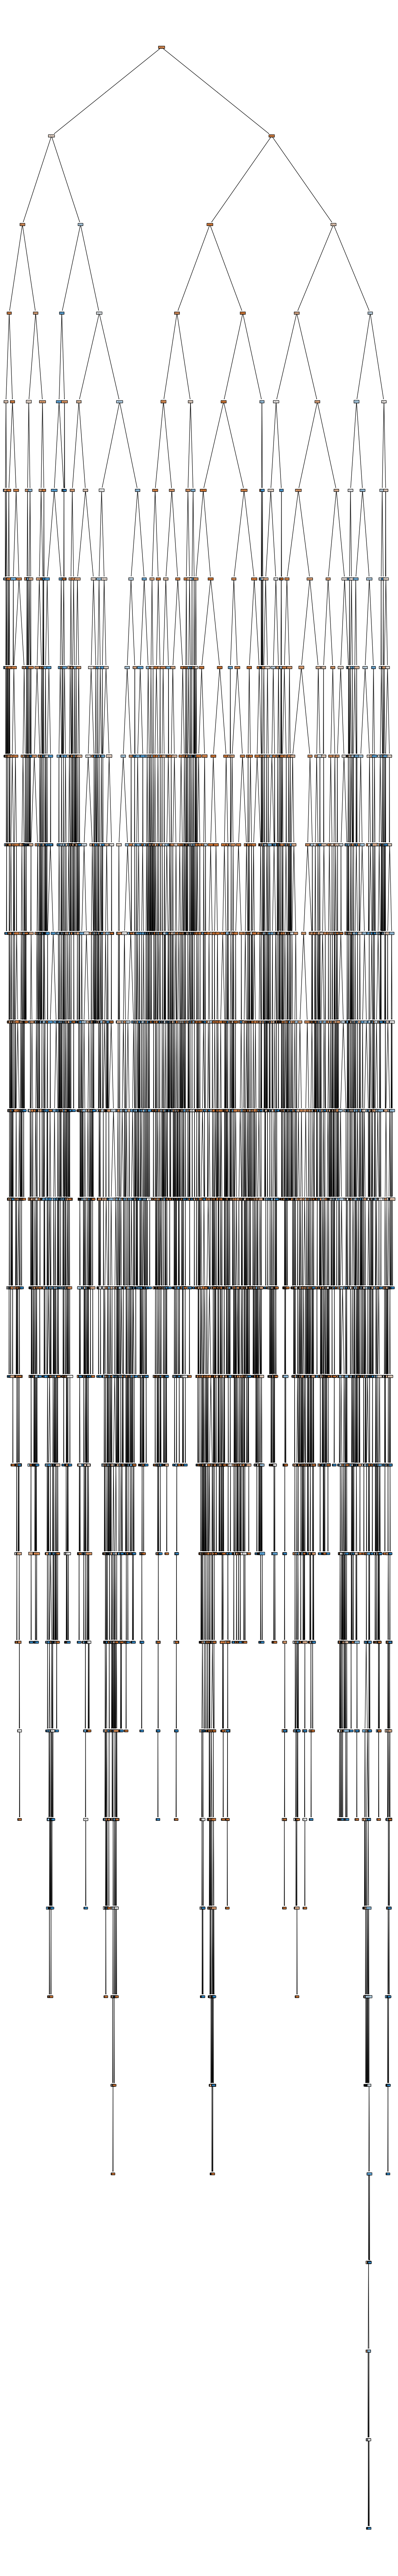

In [114]:
plt.figure(figsize = (15, 100))
tree.plot_tree(clf, filled = True, feature_names = X.columns, class_names = ['No', 'Yes'], rounded = True)
plt.show()